In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.parser import parse

import os
import sys
import re

In [2]:
# Set file path
file_path = '/Users/jiminking/Desktop/LA/WebScraping/coupang_baby_preprocessed.csv'

# Load data to pandas DataFrame
data = pd.read_csv(file_path)

# Data information
print(data.info())
print(data.tail())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   item_name_           771 non-null    object
 1   original_price       771 non-null    int64 
 2   sale_price           771 non-null    int64 
 3   rating_score         771 non-null    int64 
 4   total_reviews        771 non-null    int64 
 5   item_info            756 non-null    object
 6   discount_percentage  771 non-null    int64 
 7   delivery_guarantee   771 non-null    int64 
 8   delivery_days        771 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 54.3+ KB
None
                      item_name_  original_price  sale_price  rating_score  \
766            랄랄라 사운드 벽보 8: 구구단            5000        3150            90   
767                   종이나라 투명나라풀           14400        6630            90   
768         지앤마 써니비 남아용 1단계 유아칫솔            9900        8550       

,item_name_,original_price,sale_price,rating_score,total_reviews,item_info,discount_percentage,delivery_guarantee,delivery_days
0,주니 유아용 자기주도 빨대컵 210ml,35000,25000,90,119,"화이트, 1개",28,1,1
1,한글떼기 1~5과정 세트 전5권(개정판)(유아4~7세),30000,27000,100,1692,기탄출판,10,1,1
2,초등 미니 논술 일력 365,19800,17820,100,18,서사원주니어,10,1,1
3,락피도 철분 키즈,37000,16540,100,2905,"90g, 1개",55,1,1
4,아토팜 판테놀 유아 크림,47000,24110,100,740,"100ml, 1개",48,1,1


In [3]:
# Basic statistical measures for 'sale_price', 'original_price'
mean_original_price = round(data['original_price'].mean())
median_original_price = round(data['original_price'].median())
std_dev_original_price = round(data['original_price'].std())

mean_sale_price = round(data['sale_price'].mean())
median_sale_price = round(data['sale_price'].median())
std_dev_sale_price = round(data['sale_price'].std())


print(f"Original price - Mean: {mean_original_price} 원, Median: {median_original_price} 원, Std Dev: {std_dev_original_price}원")
print(f"Sale price - Mean: {mean_sale_price} 원, Median: {median_sale_price} 원, Std Dev: {std_dev_sale_price}원")

Original price - Mean: 25742 원, Median: 19900 원, Std Dev: 18983원
Sale price - Mean: 18811 원, Median: 13500 원, Std Dev: 15075원


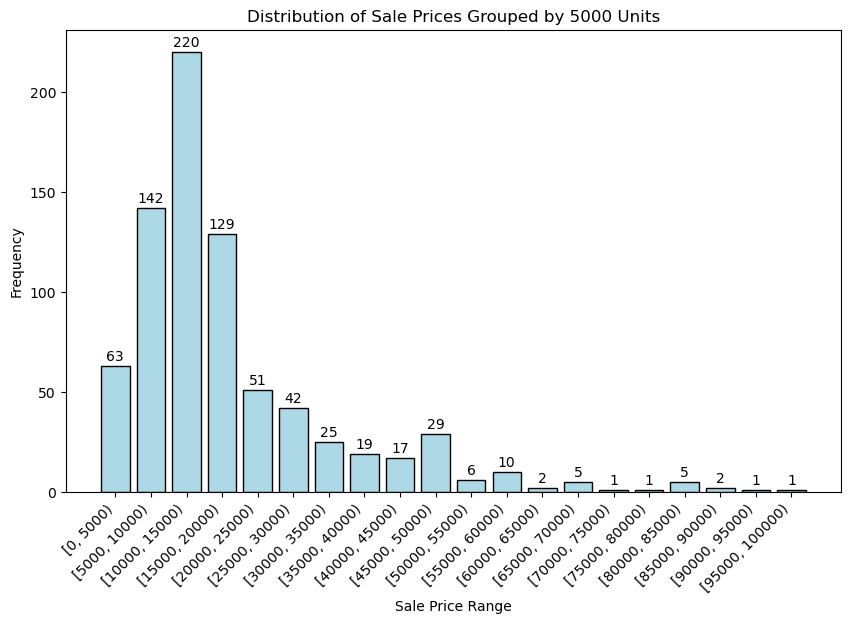

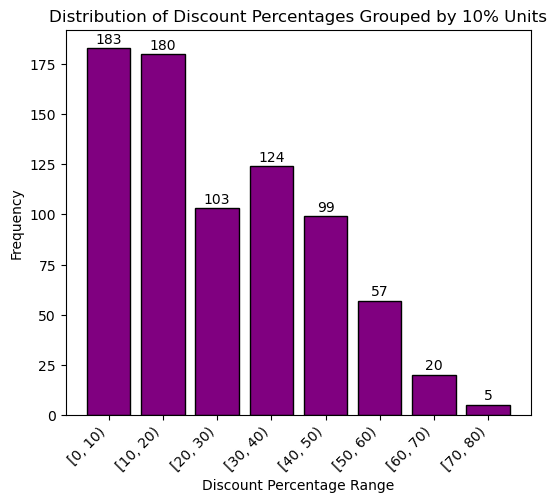

In [5]:
# grouby 5000 units
groupby_sale_price_bins = range(0, int(data['sale_price'].max()) + 5000, 5000)
data['groupby_sale_price'] = pd.cut(data['sale_price'], bins=groupby_sale_price_bins, right=False)

# Calculating the frequency of each adjusted price group
groupby_sale_price_frequency = data['groupby_sale_price'].value_counts().sort_index()

# plot 
plt.figure(figsize=(10, 6))
bars = plt.bar(groupby_sale_price_frequency.index.astype(str), groupby_sale_price_frequency.values, color='lightblue', edgecolor='black')

# label on top of the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.title('Distribution of Sale Prices Grouped by 5000 Units')
plt.xlabel('Sale Price Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.show()


# 10% units for gourouping discount
discount_bins = range(0, int(data['discount_percentage'].max()) + 10, 10)
data['discount_group'] = pd.cut(data['discount_percentage'], bins=discount_bins, right=False)

discount_group_frequency = data['discount_group'].value_counts().sort_index()

# plot
plt.figure(figsize=(6, 5))
bars = plt.bar(discount_group_frequency.index.astype(str), discount_group_frequency.values, color='purple', edgecolor='black')

# label on top of the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.title('Distribution of Discount Percentages Grouped by 10% Units')
plt.xlabel('Discount Percentage Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.show()

In [6]:
# Sorting the dataframe by 'total_reviews' in descending order to see the most popular items first
df_sorted_by_reviews = data.sort_values(by='total_reviews', ascending=False).reset_index(drop=True)
df_sorted_by_reviews.head(5)

,item_name_,original_price,sale_price,rating_score,total_reviews,item_info,discount_percentage,delivery_guarantee,delivery_days,groupby_sale_price,discount_group
0,코멧 아기물티슈 오리지널 캡형 50평량,18000,10990,100,337867,"100매, 10팩",38,1,1,"[10000, 15000)","[30, 40)"
1,코멧 아기물티슈 오리지널 캡형 50평량,34900,21490,100,337867,"100매, 20팩",38,1,1,"[20000, 25000)","[30, 40)"
2,베베앙 오리지널 플러스 아기물티슈 캡형 55평량,49800,27830,100,293951,"100매, 20개",44,1,1,"[25000, 30000)","[40, 50)"
3,베베앙 오리지널 플러스 아기물티슈 캡형 55평량,24900,13980,100,293951,"100매, 10개",43,1,1,"[10000, 15000)","[40, 50)"
4,코멧 저자극 시그니처 아기 물티슈 엠보싱 캡형 55평량,23900,12790,100,265113,"100매, 10팩",46,1,1,"[10000, 15000)","[40, 50)"
